In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# M1/M2 Mac上での警告回避
from tensorflow.compat.v1.keras.optimizers import Adam as LegacyAdam

tf.config.run_functions_eagerly(True) # eager executionを有効に
tf.data.experimental.enable_debug_mode() # なんか警告でたのでデバッグモードを有効に


In [20]:
# matplotlib config
plt.rcParams['figure.figsize'] = [4, 4]

In [38]:
# params
d = 2 # dimension
p = 0.8 # exponent of the norm

In [39]:
# カスタム活性化関数の定義
def custom_activation(x):
    return tf.pow(tf.reduce_sum(tf.abs(x) ** p, axis=-1, keepdims=True), 1/p)

In [40]:
# training dataの作成
# S^{d-1}上のランダムな点をN個生成
N = 1000
X = tf.random.normal((N, d))
X_train = X / tf.linalg.norm(X, axis=-1, keepdims=True) # normalize


In [41]:
# plt.scatter(X_train[:, 0], X_train[:, 1], s=4)

In [42]:
# 返り値は全て1
y_train = np.ones(N)

In [43]:
# モデルの定義
# ハイパーパラメータ
batch_size = 1000
epochs = 1000
n_units = 2  # 各層のユニット数

In [44]:
model = Sequential([
    Dense(n_units, input_dim=d, activation=custom_activation),
    # Dense(n_units, activation=custom_activation),
    Dense(1, activation=custom_activation)
])

In [45]:
# モデルのコンパイル
model.compile(optimizer=LegacyAdam(),
            loss='mean_squared_error')

# モデルの概要を表示
# model.summary()

In [46]:
# モデルのトレーニング
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

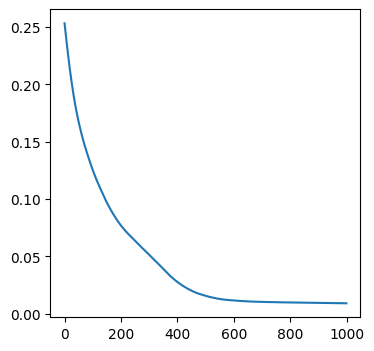

In [47]:
# 学習曲線
plt.plot(model.history.history['loss'])

In [48]:
# 結果の図示
N_test = 10000
# X_testは、R^d上のランダムな点
X_test = tf.random.normal((N_test, d))

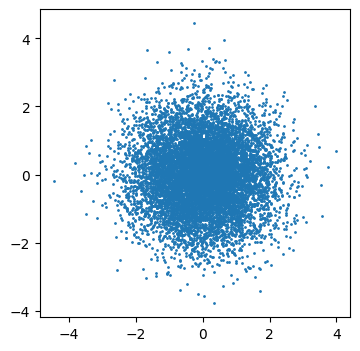

In [49]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=1)

In [50]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 830us/step


In [51]:
y_pred

array([[1.4989538 ],
       [0.7726671 ],
       [1.2282667 ],
       ...,
       [0.6128303 ],
       [0.7887902 ],
       [0.66218376]], dtype=float32)

In [52]:
# y_predが1に近い点を表示
test_list = []
for i in range(N_test):
    if 0.99 < y_pred[i] < 1.01:
    # if 0.95 < y_pred[i] < 1.05:
    # if 0.9 < y_pred[i] < 1.1:
    # if 0.5 < y_pred[i] < 1.5:
        test_list.append(X_test[i])

test_list = np.array(test_list)

In [53]:
test_list

array([[ 6.81448579e-02,  1.38401103e+00],
       [ 1.29064441e+00,  4.36152481e-02],
       [-8.77864480e-01,  4.05960202e-01],
       [ 7.53528059e-01,  4.98481095e-01],
       [ 5.21667600e-01,  7.31503963e-01],
       [ 1.04190338e+00,  2.26374865e-01],
       [ 4.53369945e-01, -7.77781248e-01],
       [ 1.12117767e+00, -2.67222255e-01],
       [ 6.19856656e-01, -6.06032431e-01],
       [-5.37528276e-01,  6.98132634e-01],
       [ 1.21742523e+00,  1.13121971e-01],
       [-5.58233023e-01, -7.26725698e-01],
       [-3.88648629e-01,  8.19600821e-01],
       [ 1.07861269e+00,  2.06798837e-01],
       [-1.89665526e-01, -1.21411192e+00],
       [-1.06275487e+00, -2.35944375e-01],
       [-2.35381555e-02,  1.23322964e+00],
       [-9.56322193e-01, -3.25196117e-01],
       [ 9.90671694e-01,  2.72457421e-01],
       [-7.13679254e-01, -5.63278854e-01],
       [-6.02574237e-02,  1.20040536e+00],
       [-1.19413877e+00,  2.02091664e-01],
       [ 1.61132991e-01,  1.24468791e+00],
       [ 1.

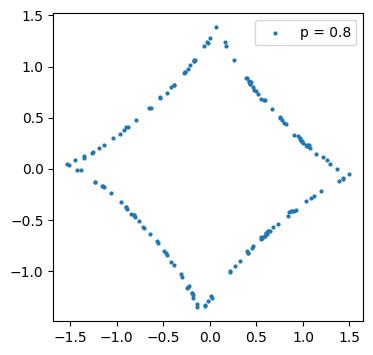

In [60]:
plt.scatter(test_list[:, 0], test_list[:, 1], s=4)
# pの値をlegendに表示
plt.legend([f'p = {p}'])